# SCRAPING GAMING

In [ ]:
!pip install google-play-scraper
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.mcdonalds.mobileapp',
    lang='id',
    country='id',
    sort=Sort.NEWEST,  # Ulasan paling baru, #MOST_RELEVANT, LATEST
    count=10000,  # Ambil 3000 ulasan
    filter_score_with=None  # Ulasan semua skor
)

In [ ]:
df_reviews = pd.DataFrame(np.array(result), columns=['review'])

df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))

df_reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e5b5beff-56e6-4841-8266-2fea4a8998c4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,malah gak bisa di buka app nya,1,0,3.25.0,2025-06-17 03:40:56,None,NaT,3.25.0
1,fe96ea2d-e2cd-4218-bde4-df017d62477b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,di setiap daftar menu makanan nya tolong tamba...,3,0,3.18.1,2025-06-17 00:10:27,None,NaT,3.18.1
2,987ce667-25c5-4796-b5fd-9bbf2d1ad462,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Lawak lama² nih apk. Mau nuker mcspicy pagi² m...,1,0,3.25.0,2025-06-16 04:02:19,None,NaT,3.25.0
3,ffb2cf87-78b5-4098-a06d-16a16b8d161e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,promo nya MCD delivery terus.. Ga kejangkau area,1,0,3.25.0,2025-06-16 02:09:46,None,NaT,3.25.0
4,63f33070-c762-4013-83eb-9a719e2750e0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,habis update aplikasi malah gabisa dibuka min,3,0,3.25.0,2025-06-15 11:01:17,None,NaT,3.25.0
...,...,...,...,...,...,...,...,...,...,...,...
8960,3fc1ab92-e2ed-467b-8a57-422eeb074f23,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,3 dulu,3,5,None,2018-08-11 06:49:31,None,NaT,None
8961,b50a6697-ace4-47cf-9e8d-a18793571f45,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bgus n mudah jdi ya,5,5,None,2018-06-26 08:48:19,None,NaT,None
8962,96729c5a-747a-49c4-873c-74b40a5591bb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,App macam apa ini tak boleh login,1,8,1.2.2,2018-05-27 10:14:46,None,NaT,1.2.2
8963,94f68783-7126-4d2b-bc0a-356c925fa28a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,YES,4,5,None,2018-05-17 01:22:12,None,NaT,None


In [ ]:
new_df = df_reviews[['userName', 'score', 'at', 'content', 'appVersion']]
sorted_df = new_df.sort_values(by='at', ascending=False)

sorted_df

,userName,score,at,content,appVersion
0,Hari Bangga,1,2025-06-17 03:40:56,malah gak bisa di buka app nya,3.25.0
1,Adhiska Faatihah,3,2025-06-17 00:10:27,di setiap daftar menu makanan nya tolong tamba...,3.18.1
2,Rizkia Wulan,1,2025-06-16 04:02:19,Lawak lama² nih apk. Mau nuker mcspicy pagi² m...,3.25.0
3,Arief Maulana,1,2025-06-16 02:09:46,promo nya MCD delivery terus.. Ga kejangkau area,3.25.0
4,Bram Kalimantara,3,2025-06-15 11:01:17,habis update aplikasi malah gabisa dibuka min,3.25.0
...,...,...,...,...,...
8960,Pengguna Google,3,2018-08-11 06:49:31,3 dulu,None
8961,Pengguna Google,5,2018-06-26 08:48:19,Bgus n mudah jdi ya,None
8962,Pengguna Google,1,2018-05-27 10:14:46,App macam apa ini tak boleh login,1.2.2
8963,Pengguna Google,4,2018-05-17 01:22:12,YES,None


In [ ]:
sorted_df.to_csv('review_McD.csv', index=None, header=True)

In [ ]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   userName    8965 non-null   object        
 1   score       8965 non-null   int64         
 2   at          8965 non-null   datetime64[ns]
 3   content     8965 non-null   object        
 4   appVersion  6544 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 350.3+ KB


In [ ]:
sorted_df = sorted_df.drop(['appVersion'], axis=1)
sorted_df.head()

,userName,score,at,content
0,Hari Bangga,1,2025-06-17 03:40:56,malah gak bisa di buka app nya
1,Adhiska Faatihah,3,2025-06-17 00:10:27,di setiap daftar menu makanan nya tolong tamba...
2,Rizkia Wulan,1,2025-06-16 04:02:19,Lawak lama² nih apk. Mau nuker mcspicy pagi² m...
3,Arief Maulana,1,2025-06-16 02:09:46,promo nya MCD delivery terus.. Ga kejangkau area
4,Bram Kalimantara,3,2025-06-15 11:01:17,habis update aplikasi malah gabisa dibuka min


# CASEFOLDING

In [ ]:
def casefolding(str):
  new_str = str.lower()
  return new_str

sorted_df['content_lower'] = sorted_df['content'].apply(casefolding)
sorted_df.head()

,userName,score,at,content,content_lower
0,Hari Bangga,1,2025-06-17 03:40:56,malah gak bisa di buka app nya,malah gak bisa di buka app nya
1,Adhiska Faatihah,3,2025-06-17 00:10:27,di setiap daftar menu makanan nya tolong tamba...,di setiap daftar menu makanan nya tolong tamba...
2,Rizkia Wulan,1,2025-06-16 04:02:19,Lawak lama² nih apk. Mau nuker mcspicy pagi² m...,lawak lama² nih apk. mau nuker mcspicy pagi² m...
3,Arief Maulana,1,2025-06-16 02:09:46,promo nya MCD delivery terus.. Ga kejangkau area,promo nya mcd delivery terus.. ga kejangkau area
4,Bram Kalimantara,3,2025-06-15 11:01:17,habis update aplikasi malah gabisa dibuka min,habis update aplikasi malah gabisa dibuka min


In [ ]:
sorted_df.head(10)

,userName,score,at,content,content_lower
0,Hari Bangga,1,2025-06-17 03:40:56,malah gak bisa di buka app nya,malah gak bisa di buka app nya
1,Adhiska Faatihah,3,2025-06-17 00:10:27,di setiap daftar menu makanan nya tolong tamba...,di setiap daftar menu makanan nya tolong tamba...
2,Rizkia Wulan,1,2025-06-16 04:02:19,Lawak lama² nih apk. Mau nuker mcspicy pagi² m...,lawak lama² nih apk. mau nuker mcspicy pagi² m...
3,Arief Maulana,1,2025-06-16 02:09:46,promo nya MCD delivery terus.. Ga kejangkau area,promo nya mcd delivery terus.. ga kejangkau area
4,Bram Kalimantara,3,2025-06-15 11:01:17,habis update aplikasi malah gabisa dibuka min,habis update aplikasi malah gabisa dibuka min
5,Dery J,2,2025-06-15 04:27:11,"ga bisa pilih opsi minuman, bagian ayam yang d...","ga bisa pilih opsi minuman, bagian ayam yang d..."
6,Bagus Permono,5,2025-06-14 09:13:38,Mantap,mantap
7,Rizal Fozan,1,2025-06-14 03:46:06,"Aplikasi Eror Terus, Payahhhjb","aplikasi eror terus, payahhhjb"
8,Mi Tar,1,2025-06-10 15:57:15,kenapa saya ga bisa masuk ya gagal trus 🤔,kenapa saya ga bisa masuk ya gagal trus 🤔
9,vincent,5,2025-06-10 14:39:42,Rasa emang ngak pernah bohong MCD dan KFC yg t...,rasa emang ngak pernah bohong mcd dan kfc yg t...


# TOKENIZATION

In [ ]:
def tokenization(str):
  tokens = word_tokenize(str)
  return tokens

sorted_df['content_token'] = sorted_df['content_lower'].apply(tokenization)
sorted_df.head()

,userName,score,at,content,content_lower,content_token
0,Hari Bangga,1,2025-06-17 03:40:56,malah gak bisa di buka app nya,malah gak bisa di buka app nya,"[malah, gak, bisa, di, buka, app, nya]"
1,Adhiska Faatihah,3,2025-06-17 00:10:27,di setiap daftar menu makanan nya tolong tamba...,di setiap daftar menu makanan nya tolong tamba...,"[di, setiap, daftar, menu, makanan, nya, tolon..."
2,Rizkia Wulan,1,2025-06-16 04:02:19,Lawak lama² nih apk. Mau nuker mcspicy pagi² m...,lawak lama² nih apk. mau nuker mcspicy pagi² m...,"[lawak, lama², nih, apk, ., mau, nuker, mcspic..."
3,Arief Maulana,1,2025-06-16 02:09:46,promo nya MCD delivery terus.. Ga kejangkau area,promo nya mcd delivery terus.. ga kejangkau area,"[promo, nya, mcd, delivery, terus, .., ga, kej..."
4,Bram Kalimantara,3,2025-06-15 11:01:17,habis update aplikasi malah gabisa dibuka min,habis update aplikasi malah gabisa dibuka min,"[habis, update, aplikasi, malah, gabisa, dibuk..."


# STOPWORDS

In [ ]:
def stopwords_removal(tokens):
  stop_words = set(stopwords.words('indonesian'))
  filtered_tokens = [token for token in tokens if token not in stop_words]
  return filtered_tokens

sorted_df['content_no_stopwords'] = sorted_df['content_token'].apply(stopwords_removal)
sorted_df.head()

,userName,score,at,content,content_lower,content_token,content_no_stopwords
0,Hari Bangga,1,2025-06-17 03:40:56,malah gak bisa di buka app nya,malah gak bisa di buka app nya,"[malah, gak, bisa, di, buka, app, nya]","[gak, buka, app, nya]"
1,Adhiska Faatihah,3,2025-06-17 00:10:27,di setiap daftar menu makanan nya tolong tamba...,di setiap daftar menu makanan nya tolong tamba...,"[di, setiap, daftar, menu, makanan, nya, tolon...","[daftar, menu, makanan, nya, tolong, tambahkan..."
2,Rizkia Wulan,1,2025-06-16 04:02:19,Lawak lama² nih apk. Mau nuker mcspicy pagi² m...,lawak lama² nih apk. mau nuker mcspicy pagi² m...,"[lawak, lama², nih, apk, ., mau, nuker, mcspic...","[lawak, lama², nih, apk, ., nuker, mcspicy, pa..."
3,Arief Maulana,1,2025-06-16 02:09:46,promo nya MCD delivery terus.. Ga kejangkau area,promo nya mcd delivery terus.. ga kejangkau area,"[promo, nya, mcd, delivery, terus, .., ga, kej...","[promo, nya, mcd, delivery, .., ga, kejangkau,..."
4,Bram Kalimantara,3,2025-06-15 11:01:17,habis update aplikasi malah gabisa dibuka min,habis update aplikasi malah gabisa dibuka min,"[habis, update, aplikasi, malah, gabisa, dibuk...","[habis, update, aplikasi, gabisa, dibuka, min]"


In [ ]:
sorted_df.head(20)

,userName,score,at,content,content_lower,content_token,content_no_stopwords
0,Hari Bangga,1,2025-06-17 03:40:56,malah gak bisa di buka app nya,malah gak bisa di buka app nya,"[malah, gak, bisa, di, buka, app, nya]","[gak, buka, app, nya]"
1,Adhiska Faatihah,3,2025-06-17 00:10:27,di setiap daftar menu makanan nya tolong tamba...,di setiap daftar menu makanan nya tolong tamba...,"[di, setiap, daftar, menu, makanan, nya, tolon...","[daftar, menu, makanan, nya, tolong, tambahkan..."
2,Rizkia Wulan,1,2025-06-16 04:02:19,Lawak lama² nih apk. Mau nuker mcspicy pagi² m...,lawak lama² nih apk. mau nuker mcspicy pagi² m...,"[lawak, lama², nih, apk, ., mau, nuker, mcspic...","[lawak, lama², nih, apk, ., nuker, mcspicy, pa..."
3,Arief Maulana,1,2025-06-16 02:09:46,promo nya MCD delivery terus.. Ga kejangkau area,promo nya mcd delivery terus.. ga kejangkau area,"[promo, nya, mcd, delivery, terus, .., ga, kej...","[promo, nya, mcd, delivery, .., ga, kejangkau,..."
4,Bram Kalimantara,3,2025-06-15 11:01:17,habis update aplikasi malah gabisa dibuka min,habis update aplikasi malah gabisa dibuka min,"[habis, update, aplikasi, malah, gabisa, dibuk...","[habis, update, aplikasi, gabisa, dibuka, min]"
5,Dery J,2,2025-06-15 04:27:11,"ga bisa pilih opsi minuman, bagian ayam yang d...","ga bisa pilih opsi minuman, bagian ayam yang d...","[ga, bisa, pilih, opsi, minuman, ,, bagian, ay...","[ga, pilih, opsi, minuman, ,, ayam, ,, super, ..."
6,Bagus Permono,5,2025-06-14 09:13:38,Mantap,mantap,[mantap],[mantap]
7,Rizal Fozan,1,2025-06-14 03:46:06,"Aplikasi Eror Terus, Payahhhjb","aplikasi eror terus, payahhhjb","[aplikasi, eror, terus, ,, payahhhjb]","[aplikasi, eror, ,, payahhhjb]"
8,Mi Tar,1,2025-06-10 15:57:15,kenapa saya ga bisa masuk ya gagal trus 🤔,kenapa saya ga bisa masuk ya gagal trus 🤔,"[kenapa, saya, ga, bisa, masuk, ya, gagal, tru...","[ga, masuk, ya, gagal, trus, 🤔]"
9,vincent,5,2025-06-10 14:39:42,Rasa emang ngak pernah bohong MCD dan KFC yg t...,rasa emang ngak pernah bohong mcd dan kfc yg t...,"[rasa, emang, ngak, pernah, bohong, mcd, dan, ...","[emang, ngak, bohong, mcd, kfc, yg, terbaik]"


## STEMMING

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  return stemmed_tokens

sorted_df['content_stemmed'] = sorted_df['content_no_stopwords'].apply(stemming)
sorted_df.head()

,userName,score,at,content,content_lower,content_token,content_no_stopwords,content_stemmed
0,Hari Bangga,1,2025-06-17 03:40:56,malah gak bisa di buka app nya,malah gak bisa di buka app nya,"[malah, gak, bisa, di, buka, app, nya]","[gak, buka, app, nya]","[gak, buka, app, nya]"
1,Adhiska Faatihah,3,2025-06-17 00:10:27,di setiap daftar menu makanan nya tolong tamba...,di setiap daftar menu makanan nya tolong tamba...,"[di, setiap, daftar, menu, makanan, nya, tolon...","[daftar, menu, makanan, nya, tolong, tambahkan...","[daftar, menu, makan, nya, tolong, tambah, tul..."
2,Rizkia Wulan,1,2025-06-16 04:02:19,Lawak lama² nih apk. Mau nuker mcspicy pagi² m...,lawak lama² nih apk. mau nuker mcspicy pagi² m...,"[lawak, lama², nih, apk, ., mau, nuker, mcspic...","[lawak, lama², nih, apk, ., nuker, mcspicy, pa...","[lawak, lama, nih, apk, , nuker, mcspicy, pagi..."
3,Arief Maulana,1,2025-06-16 02:09:46,promo nya MCD delivery terus.. Ga kejangkau area,promo nya mcd delivery terus.. ga kejangkau area,"[promo, nya, mcd, delivery, terus, .., ga, kej...","[promo, nya, mcd, delivery, .., ga, kejangkau,...","[promo, nya, mcd, delivery, , ga, jangkau, area]"
4,Bram Kalimantara,3,2025-06-15 11:01:17,habis update aplikasi malah gabisa dibuka min,habis update aplikasi malah gabisa dibuka min,"[habis, update, aplikasi, malah, gabisa, dibuk...","[habis, update, aplikasi, gabisa, dibuka, min]","[habis, update, aplikasi, gabisa, buka, min]"


In [ ]:
sorted_df.head(20)

,userName,score,at,content,content_lower,content_token,content_no_stopwords,content_stemmed
0,Hari Bangga,1,2025-06-17 03:40:56,malah gak bisa di buka app nya,malah gak bisa di buka app nya,"[malah, gak, bisa, di, buka, app, nya]","[gak, buka, app, nya]","[gak, buka, app, nya]"
1,Adhiska Faatihah,3,2025-06-17 00:10:27,di setiap daftar menu makanan nya tolong tamba...,di setiap daftar menu makanan nya tolong tamba...,"[di, setiap, daftar, menu, makanan, nya, tolon...","[daftar, menu, makanan, nya, tolong, tambahkan...","[daftar, menu, makan, nya, tolong, tambah, tul..."
2,Rizkia Wulan,1,2025-06-16 04:02:19,Lawak lama² nih apk. Mau nuker mcspicy pagi² m...,lawak lama² nih apk. mau nuker mcspicy pagi² m...,"[lawak, lama², nih, apk, ., mau, nuker, mcspic...","[lawak, lama², nih, apk, ., nuker, mcspicy, pa...","[lawak, lama, nih, apk, , nuker, mcspicy, pagi..."
3,Arief Maulana,1,2025-06-16 02:09:46,promo nya MCD delivery terus.. Ga kejangkau area,promo nya mcd delivery terus.. ga kejangkau area,"[promo, nya, mcd, delivery, terus, .., ga, kej...","[promo, nya, mcd, delivery, .., ga, kejangkau,...","[promo, nya, mcd, delivery, , ga, jangkau, area]"
4,Bram Kalimantara,3,2025-06-15 11:01:17,habis update aplikasi malah gabisa dibuka min,habis update aplikasi malah gabisa dibuka min,"[habis, update, aplikasi, malah, gabisa, dibuk...","[habis, update, aplikasi, gabisa, dibuka, min]","[habis, update, aplikasi, gabisa, buka, min]"
5,Dery J,2,2025-06-15 04:27:11,"ga bisa pilih opsi minuman, bagian ayam yang d...","ga bisa pilih opsi minuman, bagian ayam yang d...","[ga, bisa, pilih, opsi, minuman, ,, bagian, ay...","[ga, pilih, opsi, minuman, ,, ayam, ,, super, ...","[ga, pilih, opsi, minum, , ayam, , super, lot]"
6,Bagus Permono,5,2025-06-14 09:13:38,Mantap,mantap,[mantap],[mantap],[mantap]
7,Rizal Fozan,1,2025-06-14 03:46:06,"Aplikasi Eror Terus, Payahhhjb","aplikasi eror terus, payahhhjb","[aplikasi, eror, terus, ,, payahhhjb]","[aplikasi, eror, ,, payahhhjb]","[aplikasi, eror, , payahhhjb]"
8,Mi Tar,1,2025-06-10 15:57:15,kenapa saya ga bisa masuk ya gagal trus 🤔,kenapa saya ga bisa masuk ya gagal trus 🤔,"[kenapa, saya, ga, bisa, masuk, ya, gagal, tru...","[ga, masuk, ya, gagal, trus, 🤔]","[ga, masuk, ya, gagal, trus, ]"
9,vincent,5,2025-06-10 14:39:42,Rasa emang ngak pernah bohong MCD dan KFC yg t...,rasa emang ngak pernah bohong mcd dan kfc yg t...,"[rasa, emang, ngak, pernah, bohong, mcd, dan, ...","[emang, ngak, bohong, mcd, kfc, yg, terbaik]","[emang, ngak, bohong, mcd, kfc, yg, baik]"


In [ ]:
sorted_df.to_excel('review_McD_preprocessed.xlsx')

# WORDCLOUD VISUALIZATION

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

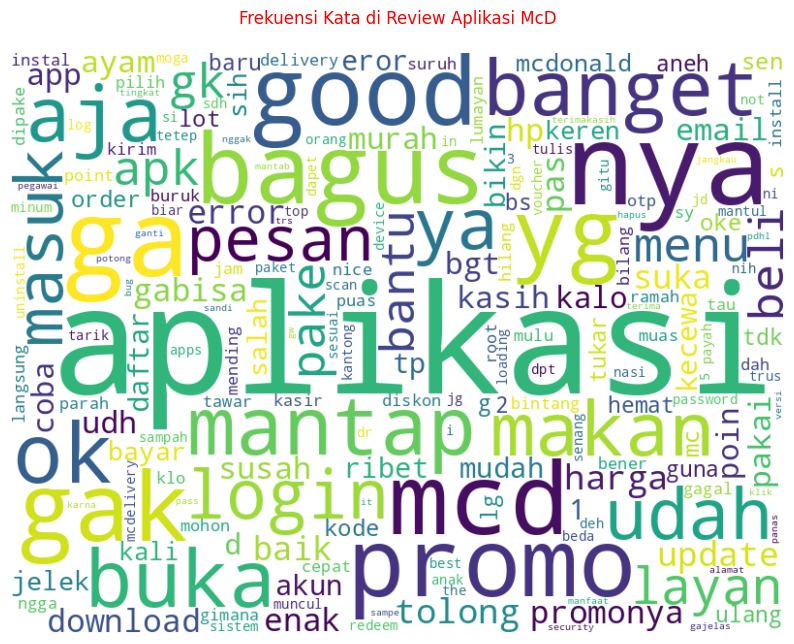

In [ ]:
from collections import Counter

chosen_series = sorted_df.content_stemmed
all_words = [word for doc in chosen_series for word in doc]
word_frequency_dict = Counter(all_words)

wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(word_frequency_dict)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frekuensi Kata di Review Aplikasi McD\n", color="red")
plt.show()

# WELCOME MR BERT


In [ ]:
!pip install bertopic==0.16.0  # Gunakan versi spesifik untuk konsistensi
!pip install transformers sentence-transformers  # Untuk embedding model
!pip install hdbscan umap-learn  # Dependency BERTopic
!pip install -U matplotlib plotly  # Untuk visualisasi
!pip install pandas openpyxl # Untuk membaca file Excel/CSV jika belum ada